# Observations
----

* It is interesting that Humidity varies as much as it does. Generally, one would think the humidity would be higher in the tropical regions closer to the equator and lower as we move towards the poles. But the data shows that there is no real predicatability. Even when broken down by Northern and Southern hemispheres, the r-squared values were significantly small and the linear regressions did not fit the observed data.

* In this data set, there are 392 cities in the Northern Hemisphere and 188 in the Southern Hemisphere. Even though there are over twice as many cities in the northern hemisphere, the results of the scatterplots and the linear regressions did not vary much when the hemispheres were grouped or separated. This means that even if we had an even split of cities in the northern and southern hemispheres, humidity, cloudiness, and wind speed would still be unpredictable with the linear regression models as the observed data would certainly vary in the same manner as we see here.

* Max temperature is the only variable that is somewhat predictable. The r-squared values for both the Northern and Southern hemispheres are 0.42 and 0.64 respectively, making the linear regression model a fairly good predictor, although still not accurate enough to put into practice. Maybe accounting for more variables, such as time of day or seasonality, would yield a better predictor of max temperature alongside latitude.

# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# This will format the date for plots below in the format of mm/dd/yy
time = time.strftime('%m/%d/%y')

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [28]:
# Set up the base URL and initial search parameters
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}units={units}&APPID={weather_api_key}&q="

# Create an empty list to store the data in as dictionaries
city_info = []

# Print initializing message
print("Beginning Data Retrieval")
print("---------------------------------------")

# Run a loop through each city in the list of cities that was generated above
for city in cities:

    # Request the data and convert it to a json object
    response = requests.get(query_url + city).json()

    # Include a try and except error handle in case the city is not found
    try:
        # Append the data in individual dictionaries per city to a list
        city_info.append({"City": city,
                          "Latitude": response['coord']['lat'],
                          "Longitude": response['coord']['lon'],
                          "Max Temperature": response['main']['temp_max'],
                          "Humidity": response['main']['humidity'],
                          "Cloudiness": response['clouds']['all'],
                          "Wind Speed": response['wind']['speed'],
                          "Country": response['sys']['country'],
                          "Date": response['dt']})

        # Print the city number (assuming this is the position in the list) and name of the city
        print(f"Processing record {cities.index(city)+1} of {len(cities)} | {city}")

        # Use sleep for 1 second in between calls to comply with the API documentation of 60 calls per minute for free accounts
        #time.sleep(1)

    # If the city is not found, print a message alerting the user   
    except:
        print("City not found. Skipping...")

        # pass allows the code to skip the missing city and continue the loop
        pass

# Print ending message
print("---------------------------------------")
print("Data Retrieval Complete")
print("---------------------------------------")

akh
Processing record 115 of 615 | kaitangata
Processing record 116 of 615 | port hardy
Processing record 117 of 615 | sistranda
Processing record 118 of 615 | houma
Processing record 119 of 615 | bandarbeyla
Processing record 120 of 615 | letlhakane
Processing record 121 of 615 | zamora
Processing record 122 of 615 | oranjestad
Processing record 123 of 615 | ulladulla
Processing record 124 of 615 | clyde river
Processing record 125 of 615 | hasaki
Processing record 126 of 615 | kahului
Processing record 127 of 615 | ningxiang
Processing record 128 of 615 | ordynskoye
Processing record 129 of 615 | sao jose da coroa grande
Processing record 130 of 615 | tambura
Processing record 131 of 615 | marsa matruh
Processing record 132 of 615 | namatanai
Processing record 133 of 615 | kloulklubed
Processing record 134 of 615 | sakakah
Processing record 135 of 615 | saint-paul-les-dax
Processing record 136 of 615 | ilulissat
Processing record 137 of 615 | chibombo
Processing record 138 of 615 | s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [2]:
# Convert the list of dictionaries into a dataframe
city_df = pd.DataFrame(city_info)

# Export the data to a CSV, set index to false so the index is dropped when exporting
city_df.to_csv("Output/city_data.csv", index=False)

# Display the number of cities with data
city_df.count()

NameError: name 'city_info' is not defined

In [30]:
# Display the first few rows of the data frame
city_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,kaka,37.35,59.61,81.05,43,0,9.93,TM,1594511988
1,rikitea,-23.12,-134.97,69.66,70,22,15.37,PF,1594511815
2,goderich,43.75,-81.72,75.00,75,69,13.27,CA,1594511896
3,banjaran,-7.05,107.59,70.68,79,76,3.24,ID,1594511989
4,juneau,58.30,-134.42,59.00,72,90,14.99,US,1594511742


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
# Use describe function to see if max value for humidity exceeds 100
city_df.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,19.942241,17.203862,68.997862,71.636207,48.044828,7.919224,1.594512e+09
std,33.233958,92.798025,14.397561,19.802925,36.810978,5.366575,1.189907e+02
min,-54.800000,-179.170000,32.000000,3.000000,0.000000,0.340000,1.594512e+09
25%,-8.495000,-68.680000,57.200000,63.000000,12.750000,3.870000,1.594512e+09
50%,24.550000,22.715000,71.455000,77.000000,44.000000,6.930000,1.594512e+09
75%,49.637500,102.535000,79.000000,86.000000,82.000000,10.677500,1.594512e+09
max,78.220000,179.320000,107.600000,100.000000,100.000000,33.420000,1.594512e+09


In [32]:
#  Get the indices of cities that have humidity over 100%, if there are none then this array will be empty
humidity_over_100_df = (city_df.loc[city_df["Humidity"] > 100].index.values)
humidity_over_100_df

array([], dtype=int64)

In [33]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# If there are no humidty outliers, this will return a dataframe with the same data as above
clean_city_data = pd.DataFrame(city_df).drop(humidity_over_100_df, inplace=False)
clean_city_data.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,kaka,37.35,59.61,81.05,43,0,9.93,TM,1594511988
1,rikitea,-23.12,-134.97,69.66,70,22,15.37,PF,1594511815
2,goderich,43.75,-81.72,75.00,75,69,13.27,CA,1594511896
3,banjaran,-7.05,107.59,70.68,79,76,3.24,ID,1594511989
4,juneau,58.30,-134.42,59.00,72,90,14.99,US,1594511742


In [34]:
# Extract relevant fields from the data frame
clean_city_data = clean_city_data.drop(["City", "Longitude", "Date", "Country"], axis=1)
# Export the City_Data into a csv
clean_city_data.to_csv("Output/clean_city_data.csv", index=False)
clean_city_data.head()

,Latitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,37.35,81.05,43,0,9.93
1,-23.12,69.66,70,22,15.37
2,43.75,75.00,75,69,13.27
3,-7.05,70.68,79,76,3.24
4,58.30,59.00,72,90,14.99


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [35]:
# Create a function that will accept x and y values and axis names, will return a scatterplot with title, x label, and a grid
def scatterplot(x, y, name_x, name_y):
    plt.scatter(x , y, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
    plt.title(f"City {name_x} vs. {name_y} ({time})")
    plt.xlabel(f"{name_x}")
    plt.grid()

## Latitude vs. Temperature Plot

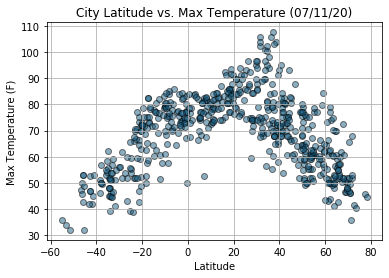

In [92]:
# Call the scatterplot function defined above to create scatterplot, set y label, show the scatterplot
scatterplot(clean_city_data["Latitude"], clean_city_data["Max Temperature"], clean_city_data["Latitude"].name, clean_city_data["Max Temperature"].name)
plt.ylabel("Max Temperature (F)");
plt.savefig("Images/Latitude vs. Max Temperature.png", dpi=100)

This plot is comparing the latitude and max temperature. It appears to depict that the max temperature decreases as we move away from the equator in either direction. Currently the max temperature in the Northern Hemisphere, at around a latitude of 20 to 40 degrees, seems to be highest.

## Latitude vs. Humidity Plot

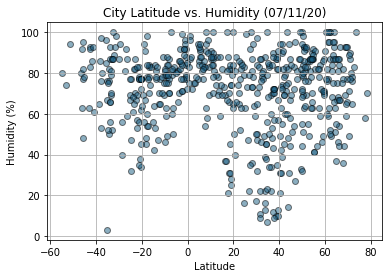

In [93]:
# Call the scatterplot function defined above to create scatterplot, set y label, show the scatterplot
scatterplot(clean_city_data["Latitude"], clean_city_data["Humidity"], clean_city_data["Latitude"].name, clean_city_data["Humidity"].name)
plt.ylabel("Humidity (%)");
plt.savefig("Images/Latitude vs. Humidity.png", dpi=100)

This plot is comparing the latitude and humidity. Humidity doesn't seem to have a significant difference and is pretty consistent around 80%, however it may be slightly lower in the Northern Hemisphere due to the plot having a bit more spread in that region.

## Latitude vs. Cloudiness Plot

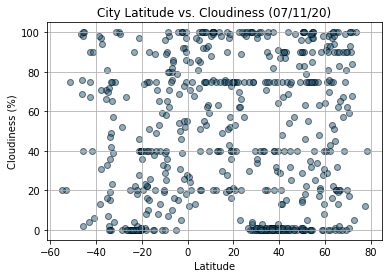

In [94]:
# Call the scatterplot function defined above to create scatterplot, set y label, show the scatterplot
scatterplot(clean_city_data["Latitude"], clean_city_data["Cloudiness"], clean_city_data["Latitude"].name, clean_city_data["Cloudiness"].name)
plt.ylabel("Cloudiness (%)");
plt.savefig("Images/Latitude vs. Cloudiness.png", dpi=100)

This plot is comparing the latitidue and cloud coverage. Cloud coverage seems to be spread out, with a bit of concentration around no cloud coverage in the 30 to 50 degree latitude range.

## Latitude vs. Wind Speed Plot

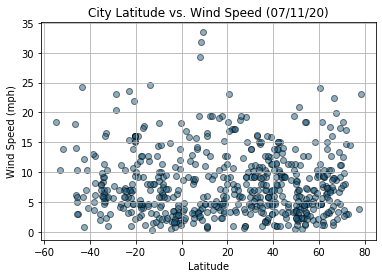

In [95]:
# Call the scatterplot function defined above to create scatterplot, set y label, show the scatterplot
scatterplot(clean_city_data["Latitude"], clean_city_data["Wind Speed"], clean_city_data["Latitude"].name, clean_city_data["Wind Speed"].name)
plt.ylabel("Wind Speed (mph)");
plt.savefig("Images/Latitude vs. Wind Speed.png", dpi=100)

This plot is comparing latitude and wind speed. Wind speed seems to be stable between 5-10 mph or less at most latitudes. This tells us that there is always a slight breeze in most locations.

## Linear Regression

In [77]:
# This function will create linear regression plots and returns the value of line_equation so we can set the best location to display the equation of the line
def linear_regression(x_value, y_value, x_name, y_name):
    x_values = np.array(x_value)
    y_values = np.array(y_value)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue**2}\n")
    plt.scatter(x_values,y_values, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
    plt.plot(x_values,regress_values,"r-")
    plt.ylabel(y_name)
    plt.xlabel(x_name)
    return line_equation

In [112]:
# Create Northern and Southern Hemisphere DataFrames
# Northern hemisphere consists of latitidues greather than 0
northern = clean_city_data.loc[clean_city_data["Latitude"] >= 0]

# Southern hemisphere consists of latitidues greather than 0
southern = clean_city_data.loc[clean_city_data["Latitude"] < 0]

# Using northern.count() yields 392 data points and southern.count() yields 188

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4197333278277155



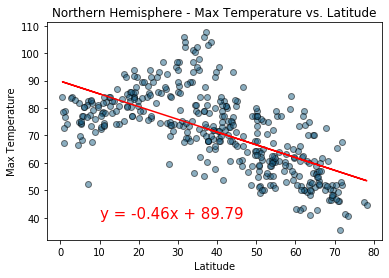

In [98]:
# Call the linear_regression function defined above, set the best location for the equation of the line, add a title, save the image
line = linear_regression(northern["Latitude"], northern["Max Temperature"], northern["Latitude"].name, northern["Max Temperature"].name)
plt.annotate(line,(10,40),fontsize=15,color="red");
plt.title("Northern Hemisphere - Max Temperature vs. Latitude");
plt.savefig("Images/Northern Hemisphere - Max Temperature vs. Latitude.png", dpi=100)

As we saw in the scatterplot for Latitude vs Max Temp where both hemispheres were included, this Northern Hemisphere portion shows a similar pattern. As we move away from the equator the temperatures decrease. With an r-squared value of 0.42, we cannot say that max temperature can be predicted very well by latitude in the Northern Hemisphere based on this specific data set. In other words, the linear regression model does not fit the observed data all that well.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6376187073037881



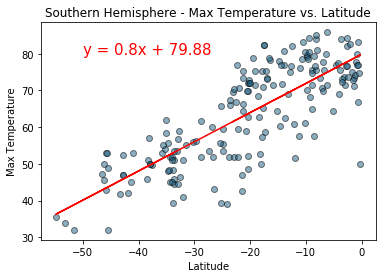

In [100]:
# Call the linear_regression function defined above, set the best location for the equation of the line, add a title, save the image
line = linear_regression(southern["Latitude"], southern["Max Temperature"], southern["Latitude"].name, southern["Max Temperature"].name)
plt.annotate(line,(-50,80),fontsize=15,color="red");
plt.title("Southern Hemisphere - Max Temperature vs. Latitude");
plt.savefig("Images/Southern Hemisphere - Max Temperature vs. Latitude.png", dpi=100)

The linear regression model represents the observed data a bit better in the Southern Hemisphere as seen by the r-squared value of 0.64. There is still some variation in the observed data but it is much better than in the Northern Hemisphere. Again, as we move away from the equator, the temperature decreases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 3.7613198928258794e-05



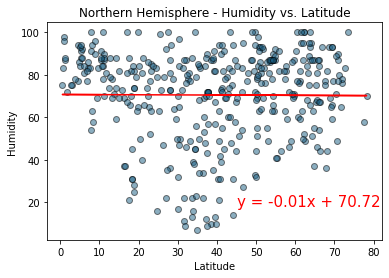

In [101]:
# Call the linear_regression function defined above, set the best location for the equation of the line, add a title, save the image
line = linear_regression(northern["Latitude"], northern["Humidity"], northern["Latitude"].name, northern["Humidity"].name)
plt.annotate(line,(45,18),fontsize=15,color="red");
plt.title("Northern Hemisphere - Humidity vs. Latitude");
plt.savefig("Images/Northern Hemisphere - Humidity vs. Latitude.png", dpi=100)

There is no fit here. The observed data varies significantly and is far too spread out to make a reliable linear regression. It is safe to say that humidity cannot be predicted by latitude in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0023281941449729126



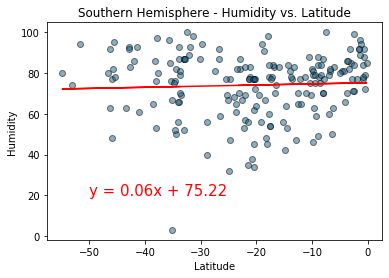

In [102]:
# Call the linear_regression function defined above, set the best location for the equation of the line, add a title, save the image
line = linear_regression(southern["Latitude"], southern["Humidity"], southern["Latitude"].name, southern["Humidity"].name)
plt.annotate(line,(-50,20),fontsize=15,color="red");
plt.title("Southern Hemisphere - Humidity vs. Latitude");
plt.savefig("Images/Southern Hemisphere - Humidity vs. Latitude.png", dpi=100)

The same thing can be said about the Southern Hemisphere, the r-squared value is far too small to make the linear regression model believable. It is definitely much more reliable in the Southern Hemisphere than in the Northern Hemisphere in terms of predictability, but it is still insignificant and should not be used.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.006464527416349581



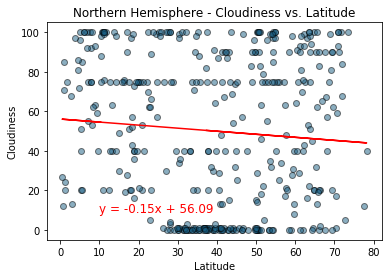

In [103]:
# Call the linear_regression function defined above, set the best location for the equation of the line, add a title, save the image
line = linear_regression(northern["Latitude"], northern["Cloudiness"], northern["Latitude"].name, northern["Cloudiness"].name)
plt.annotate(line,(10,9),fontsize=12,color="red");
plt.title("Northern Hemisphere - Cloudiness vs. Latitude");
plt.savefig("Images/Northern Hemisphere - Cloudiness vs. Latitude.png", dpi=100)

As we saw with Humidity, Cloudiness also seems to be unpredictable at different latitudes in the Northern Hemisphere. There is a small coefficient of determination (r-squared = 0.006) which means the regression model does not fit the observed data.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005061082087634679



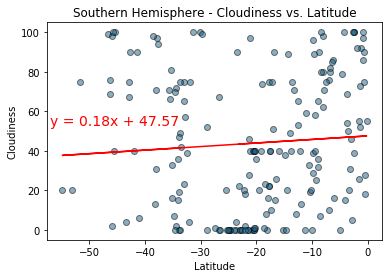

In [104]:
# Call the linear_regression function defined above, set the best location for the equation of the line, add a title, save the image
line = linear_regression(southern["Latitude"], southern["Cloudiness"], southern["Latitude"].name, southern["Cloudiness"].name)
plt.annotate(line,(-57,53),fontsize=14,color="red");
plt.title("Southern Hemisphere - Cloudiness vs. Latitude");
plt.savefig("Images/Southern Hemisphere - Cloudiness vs. Latitude.png", dpi=100)

Similar to the Northern Hemisphere, the Southern Hemisphere also has unpredictable Cloudiness. The coefficient of determination is very similar to the Northern Hemisphere so we can go so far as to say that Cloudiness cannot be predicted in either hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0032564881747053345



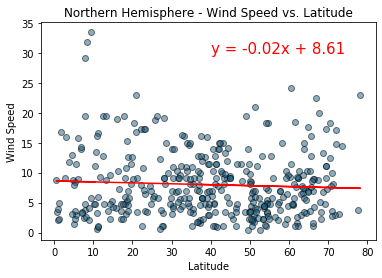

In [105]:
# Call the linear_regression function defined above, set the best location for the equation of the line, add a title, save the image
line = linear_regression(northern["Latitude"], northern["Wind Speed"], northern["Latitude"].name, northern["Wind Speed"].name)
plt.annotate(line,(40,30),fontsize=15,color="red");
plt.title("Northern Hemisphere - Wind Speed vs. Latitude");
plt.savefig("Images/Northern Hemisphere - Wind Speed vs. Latitude.png", dpi=100)

Wind speed seems to vary quite a bit in the Northern Hemisphere, making it difficult to find a line of best fit. While the plot does appear to fit in some fashion, the r-quared value of 0.003 confirms that there is no real fit.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03474025208571482



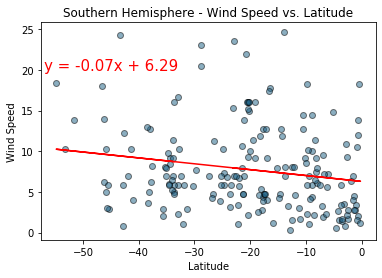

In [106]:
# Call the linear_regression function defined above, set the best location for the equation of the line, add a title, save the image
line = linear_regression(southern["Latitude"], southern["Wind Speed"], southern["Latitude"].name, southern["Wind Speed"].name)
plt.annotate(line,(-57,20),fontsize=15,color="red");
plt.title("Southern Hemisphere - Wind Speed vs. Latitude");
plt.savefig("Images/Southern Hemisphere - Wind Speed vs. Latitude.png", dpi=100)

A better fit in the Southern Hemisphere for the regression model but still a lot of variance. It seems as though wind speed is variable and cannot be predicted by latitude.